# Cartopy - картографические проекции и геораспределенные данные

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ccrs.PlateCarree()

In [3]:
ccrs.Mercator()

In [4]:
ccrs.Mollweide()

In [5]:
ccrs.Robinson()

In [6]:
ccrs.NorthPolarStereo()

Посмотреть полный список проекций смотрим [здесь](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html)

## Какие проекции нужны? (XKCD)
![](https://imgs.xkcd.com/comics/map_projections.png)

[Очень классная визуализация проекций](https://www.jasondavies.com/maps/transition/)

Примеры, когда использования картографических проекций немного (или много) не хватало... (непосредственно на занятии)

In [7]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.bbox'] = 'tight'

При использовании проекции cartopy у осей (axes) появлются дополнительные методы: 

например, coastlines

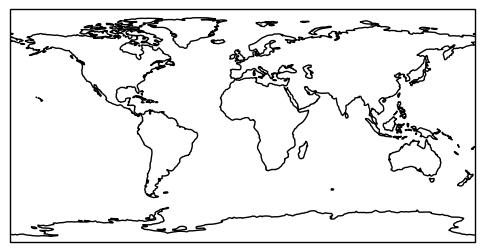

In [8]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection= ccrs.PlateCarree())
ax.coastlines()

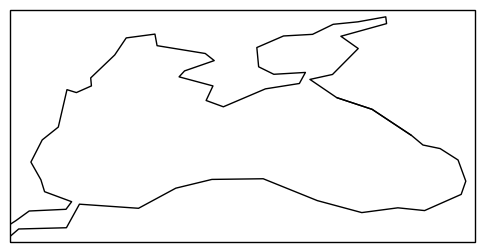

In [9]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection= ccrs.PlateCarree())
ax.set_extent([27., 42., 40., 47.5])
ax.coastlines()


Очевидно для маленьких районов не хватает разрешения береговой черты

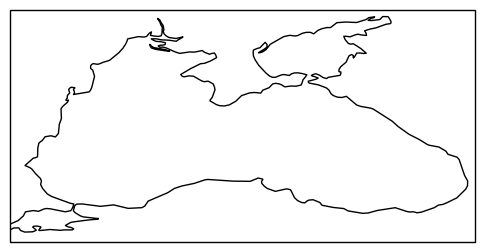

In [10]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection= ccrs.PlateCarree())
ax.set_extent([27., 42., 40., 47.5])
ax.coastlines('50m')


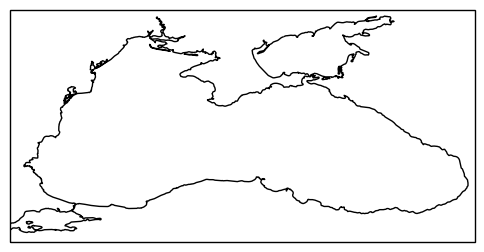

In [11]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection= ccrs.PlateCarree())
ax.set_extent([27., 42., 40., 47.5])
ax.coastlines('10m')


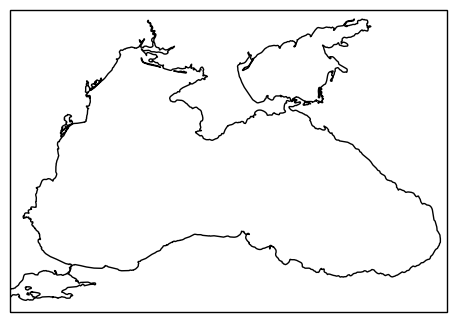

In [12]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection= ccrs.Mercator())
ax.set_extent([27., 42., 40., 47.5])
ax.coastlines('10m')


In [13]:
ccrs.Mercator?

Init signature:
ccrs.Mercator(
    ['central_longitude=0.0', 'min_latitude=-80.0', 'max_latitude=84.0', 'globe=None', 'latitude_true_scale=None', 'false_easting=0.0', 'false_northing=0.0', 'scale_factor=None'],
)
Docstring:      A Mercator projection.
Init docstring:
Parameters
----------
central_longitude: optional
    The central longitude. Defaults to 0.
min_latitude: optional
    The maximum southerly extent of the projection. Defaults
    to -80 degrees.
max_latitude: optional
    The maximum northerly extent of the projection. Defaults
    to 84 degrees.
globe: A :class:`cartopy.crs.Globe`, optional
    If omitted, a default globe is created.
latitude_true_scale: optional
    The latitude where the scale is 1. Defaults to 0 degrees.
false_easting: optional
    X offset from the planar origin in metres. Defaults to 0.
false_northing: optional
    Y offset from the planar origin in metres. Defaults to 0.
scale_factor: optional
    Scale factor at natural origin. Defaults to unused.

In [14]:
ccrs.LambertConformal?

Init signature:
ccrs.LambertConformal(
    ['central_longitude=-96.0', 'central_latitude=39.0', 'false_easting=0.0', 'false_northing=0.0', 'secant_latitudes=None', 'standard_parallels=None', 'globe=None', 'cutoff=-30'],
)
Docstring:      A Lambert Conformal conic projection.
Init docstring:
Parameters
----------
central_longitude: optional
    The central longitude. Defaults to -96.
central_latitude: optional
    The central latitude. Defaults to 39.
false_easting: optional
    X offset from planar origin in metres. Defaults to 0.
false_northing: optional
    Y offset from planar origin in metres. Defaults to 0.
secant_latitudes: optional
    Secant latitudes. This keyword is deprecated in v0.12 and directly
    replaced by ``standard parallels``. Defaults to None.
standard_parallels: optional
    Standard parallel latitude(s). Defaults to (33, 45).
globe: optional
    A :class:`cartopy.crs.Globe`. If omitted, a default globe is
    created.
cutoff: optional
    Latitude of map cutoff.

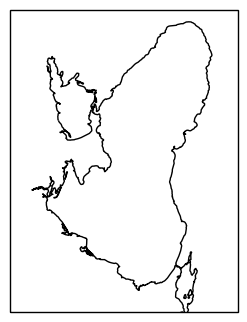

In [15]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection= ccrs.LambertConformal())
ax.set_extent([27., 42., 40., 47.5])
ax.coastlines('10m')


Почему так отобразилось?

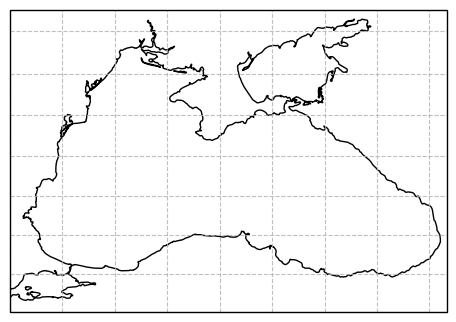

In [16]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection= ccrs.Mercator())
ax.set_extent([27., 42., 40., 47.5])
ax.coastlines('10m')
gl = ax.gridlines(linestyle='--',alpha=0.8)


In [17]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

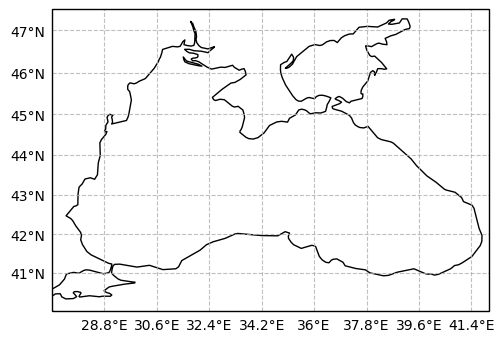

In [18]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection= ccrs.Mercator())
ax.set_extent([27., 42., 40., 47.5])
ax.coastlines('50m')
gl = ax.gridlines(linestyle='--',alpha=0.8,draw_labels=True)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [19]:
import matplotlib.ticker as ticker

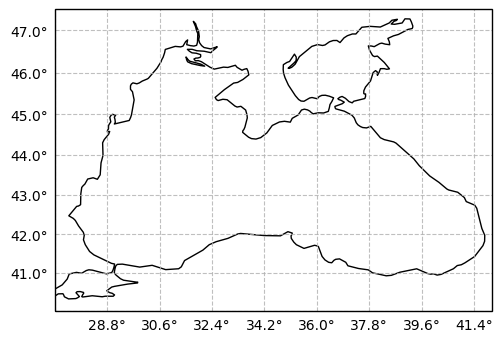

In [20]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection= ccrs.Mercator())
ax.set_extent([27., 42., 40., 47.5])
ax.coastlines('50m')
gl = ax.gridlines(linestyle='--',alpha=0.8,draw_labels=True)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = ticker.FormatStrFormatter('%3.1f\u00b0')
gl.yformatter = ticker.FormatStrFormatter('%3.1f\u00b0')

In [21]:
import cartopy.feature as cf

In [22]:
LAND = cf.NaturalEarthFeature(category='physical', scale='50m', name='land',color = cf.COLORS['land'])

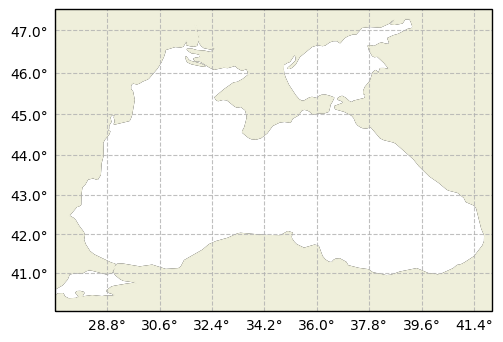

In [23]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection= ccrs.Mercator())
ax.set_extent([27., 42., 40., 47.5])
ax.coastlines('50m')
ax.add_feature(LAND)
gl = ax.gridlines(linestyle='--',alpha=0.8,draw_labels=True)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = ticker.FormatStrFormatter('%3.1f\u00b0')
gl.yformatter = ticker.FormatStrFormatter('%3.1f\u00b0')

In [24]:
import xarray as xr

In [25]:
ds = xr.open_dataset('/home/mizyuk/Data/REMSS/gulf_stream_20060101_20081231.nc')

In [26]:
ds

<xarray.Dataset>
Dimensions:       (lat: 239, lon: 478, time: 1096)
Coordinates:
  * lat           (lat) float32 34.0576 34.14549 34.23338 ... 54.88766 54.97555
  * lon           (lon) float32 -81.957985 -81.870094 ... -40.12206 -40.03417
  * time          (time) datetime64[ns] 2006-01-01T12:00:00 ... 2008-12-31T12:00:00
Data variables:
    analysed_sst  (time, lat, lon) float32 ...

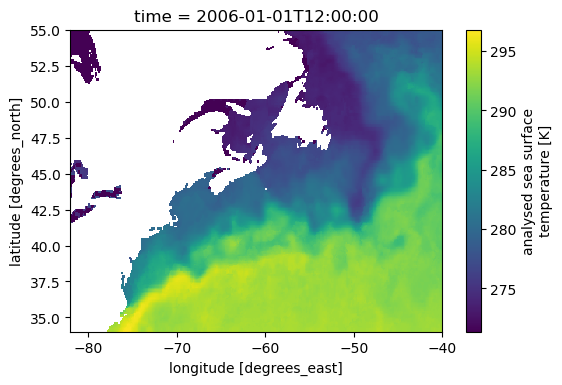

In [27]:
ds['analysed_sst'][0].plot()

In [28]:
LAND = cf.NaturalEarthFeature(category='physical', scale='110m', name='land',color = cf.COLORS['land'])

In [29]:
crs = ccrs.PlateCarree()

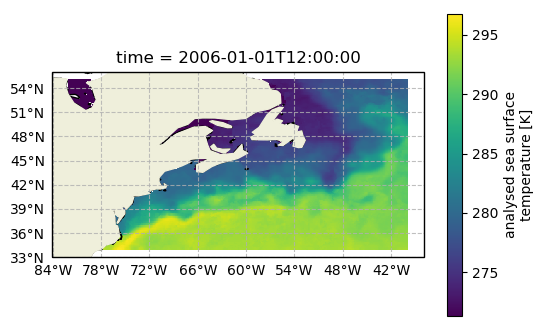

In [30]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection=crs)
ax.coastlines('50m')
ax.add_feature(LAND)
gl = ax.gridlines(linestyle='--',alpha=0.8,draw_labels=True)
ds['analysed_sst'][0].plot(ax=ax)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [31]:
crs = ccrs.Mercator()

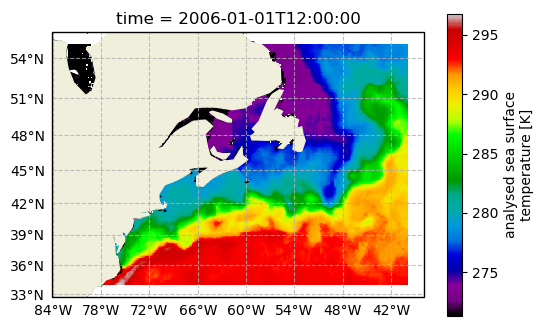

In [32]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection=crs)
ax.coastlines('50m')
ax.add_feature(LAND)
gl = ax.gridlines(linestyle='--',alpha=0.8,draw_labels=True)
ds['analysed_sst'][0].plot(ax=ax,transform=ccrs.PlateCarree(),cmap='nipy_spectral')
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

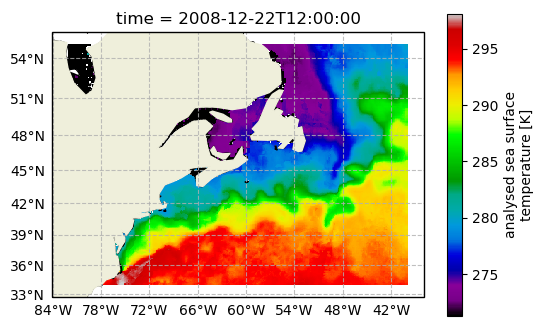

In [33]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection=crs)
ax.coastlines('50m')
ax.add_feature(LAND)
gl = ax.gridlines(linestyle='--',alpha=0.8,draw_labels=True)
ds['analysed_sst'][-10].plot(ax=ax,transform=ccrs.PlateCarree(),cmap='nipy_spectral')
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [34]:
sstc = ds['analysed_sst']-273.15

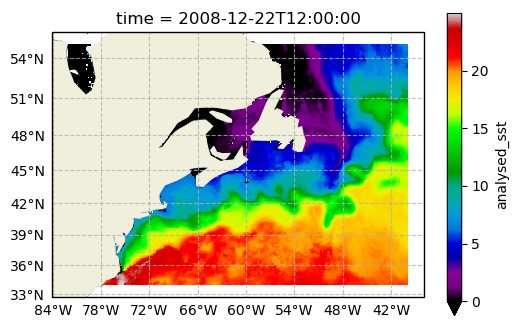

In [36]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection=crs)
ax.coastlines('50m')
ax.add_feature(LAND)
gl = ax.gridlines(linestyle='--',alpha=0.8,draw_labels=True)
sstc[-10].plot(ax=ax,transform=ccrs.PlateCarree(),cmap='nipy_spectral',vmin=0.)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

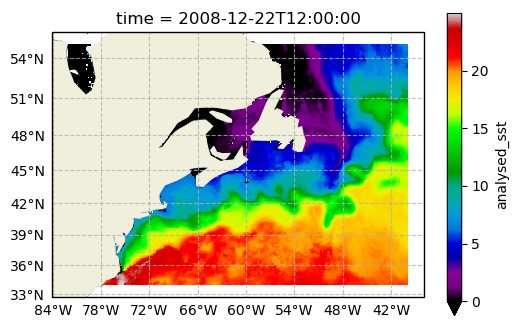

In [36]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection=crs)
ax.coastlines('50m')
ax.add_feature(LAND)
gl = ax.gridlines(linestyle='--',alpha=0.8,draw_labels=True)
sstc[-10].plot(ax=ax,transform=ccrs.PlateCarree(),cmap='nipy_spectral',vmin=0.)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

In [37]:
sstc = sstc.sel(lat=slice(36,48),lon=slice(-72,54))

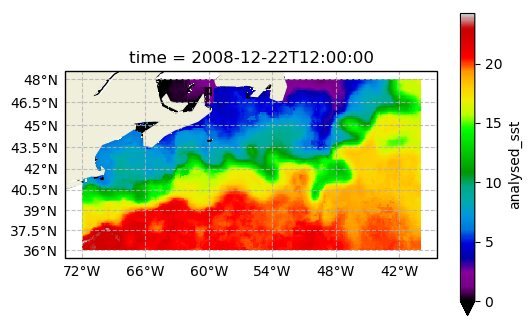

In [38]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection=crs)
ax.coastlines('50m')
ax.add_feature(LAND)
gl = ax.gridlines(linestyle='--',alpha=0.8,draw_labels=True)
sstc[-10].plot(ax=ax,transform=ccrs.PlateCarree(),cmap='nipy_spectral',vmin=0.)
gl.xlabels_top = gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER